[Gradient Descent](https://gist.github.com/sagarmainkar/41d135a04d7d3bc4098f0664fe20cf3c)

In [1]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import MinMaxScaler, QuantileTransformer, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

pd.options.display.max_columns = None
pd.options.display.max_rows = 100

num_games = 4

In [2]:
def scaler(x): 
    x = round(x,0)
    return x
#     if x <= 10: 
#         return 1
#     elif x >10 and x <= 20: 
#         return 2 
#     elif x > 20 and x <=30: 
#         return 3 
#     elif x >30 and x <= 40: 
#         return 4
#     else: 
#         return 5
    
    

In [3]:
df_1920 = pd.read_csv(f'../NewData/AVG(19-20)[{num_games}].csv').drop('Unnamed: 0', axis =1)
df_1819 = pd.read_csv(f'../NewData/AVG(18-19)[{num_games}].csv').drop('Unnamed: 0', axis =1)
merged_df = df_1920.append(df_1819, ignore_index = True)
merged_df.dropna(inplace = True)
#merged_df = merged_df[merged_df.FDP != 0]
merged_df['NN'] = merged_df.FDP.map(scaler)
merged_df.head(3)

,GameID,Name,Date,Team,FDP,FDS,FD_change,FD_pos,OPP,Home,Away,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,+-,4_MP,4_FG,4_FGA,4_FG%,4_3P,4_3PA,4_3P%,4_FT,4_FTA,4_FT%,4_ORB,4_DRB,4_TRB,4_AST,4_STL,4_BLK,4_TOV,4_PF,4_PTS,4_+-,4_FDP,4_FDS,NFDP,NN
1197,20191030-cha-sac,Malik Monk,20191030.0,cha,24.8,4000.0,400.0,2.0,sac,1.0,0.0,20.26,7.0,12.0,0.583,4.0,7.0,0.571,0.0,0.0,0.000,0.0,4.0,4.0,2.0,0.0,0.0,1.0,2.0,18.0,15.0,11.0275,2.00,4.5,0.39575,0.25,2.00,0.05000,0.0,0.00,0.000,0.00,0.50,0.50,1.25,0.50,0.25,1.50,1.00,4.25,-5.50,9.40,3900.0,14.6,25.0
1198,20191030-cha-sac,Miles Bridges,20191030.0,cha,25.8,5700.0,500.0,3.0,sac,1.0,0.0,33.58,7.0,11.0,0.636,3.0,5.0,0.600,0.0,0.0,0.000,1.0,3.0,4.0,2.0,1.0,1.0,5.0,2.0,17.0,-1.0,22.4850,3.25,8.0,0.35275,1.50,3.75,0.36325,1.5,1.75,0.375,1.25,2.75,4.00,2.00,0.25,0.25,1.75,1.50,9.50,-3.25,24.65,5950.0,12.1,26.0
1199,20191030-cha-sac,Terry Rozier,20191030.0,cha,48.0,7000.0,800.0,1.0,sac,1.0,0.0,34.53,7.0,15.0,0.467,3.0,6.0,0.500,5.0,7.0,0.714,2.0,3.0,5.0,6.0,3.0,2.0,4.0,4.0,22.0,-5.0,20.1425,4.00,9.0,0.39775,1.50,4.25,0.18225,1.0,1.00,0.250,0.25,2.50,2.75,3.50,0.50,0.25,2.50,2.75,10.50,-4.75,25.45,6575.0,34.5,48.0


In [4]:
values = merged_df.values[:,4]
values

array([24.8, 25.8, 48.0, ..., 0.0, 0.0, 0.0], dtype=object)

In [5]:
# x_col ='{}_MP 10_FG 10_FGA 10_FG% 10_3P 10_3PA 10_3P% 10_FT 10_FTA 10_FT% 10_ORB 10_DRB 10_TRB 10_AST 10_STL \
#10_BLK 10_TOV 10_PF 10_PTS 10_+- 10_FDP'.split()
# col = ['MP', 'FG', 'FGA', 'FG%', '3P', '3PA',
#                   '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
#                   'TOV', 'PF', 'PTS', '+-', 'FDP','FDS']
col = ['MP', 'FG', 'FGA', '3P', '3PA',
        'FT', 'FTA', 'TRB', 'AST', 'STL', 'BLK',
        'PTS', '+-', 'FDP']#, 'FDS']
x_col = [f'{num_games}_{i}' for i in col] + ['FDS', 'FD_change']
X = np.array(merged_df[[i for i in x_col]])
y = np.array(merged_df[['NN']])



In [6]:
#assert False

In [7]:
from keras import losses
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential 
from keras.layers import Dense, Dropout, LSTM
from keras import optimizers
from keras.optimizers import Adam

Using TensorFlow backend.


In [8]:

def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true))) 

def sequential_AAN(x,y, metrics = ['accuracy']): 
    adams = Adam(learning_rate = .001)
    model = Sequential()
    
    model.add(Dense(x.shape[1], kernel_initializer = 'normal',input_dim = x.shape[1], activation = 'relu'))
    
    model.add(Dense(256, kernel_initializer = 'normal', activation = 'relu'))
    
    model.add(Dense(256, kernel_initializer = 'normal', activation = 'relu'))
    
    
    model.add(Dense(1, kernel_initializer = 'normal', activation = 'linear'))#, activation = 'softmax'))
    model.compile(loss = losses.mean_absolute_error, optimizer = adams, metrics = metrics)
    return model

def multivar_RNN(x,y): 
    model = Sequential()
    units = 128
    drop = .2
    
    #input
    model.add(LSTM(units, return_sequences = True, input_shape = (1,x.shape[2])))
    model.add(Dropout(drop))
    
    #1st
    model.add(LSTM(units = units, return_sequences = True, input_shape = (1,x.shape[2])))
    model.add(Dropout(drop))
    
    #2nd
    model.add(LSTM(units = units, return_sequences = True, input_shape = (1,x.shape[2])))
    model.add(Dropout(drop))
    
    #3rd
    model.add(LSTM(units, return_sequences = False, input_shape = (1,x.shape[2])))
    model.add(Dropout(drop))
    
    #output
    model.add(Dense(1))
    
    model.compile(optimizer = 'adam', loss = 'mae', metrics = ['accuracy'])
    
    return model
        
    
    
    


In [9]:
epo = 100
batches = 16
type_nn = 'mult_rnn'

train_size = .7 
test_size = .3 
x_train, x_test, y_train, y_test = train_test_split(X,y, train_size = train_size)
min_max = MinMaxScaler(feature_range = (0,1)) 
standard = StandardScaler()

if type_nn == 'seq_an':
    model = sequential_AAN(X, y)
    model.fit(x_train, y_train, epochs = epo, batch_size=batches, validation_data = (x_test, y_test))
    
elif type_nn == 'mult_rnn':
    lookback = 1
    x_train = standard.fit_transform(x_train)
    x_test = standard.fit_transform(x_test)
    x_test = x_test.reshape((x_test.shape[0], lookback, x_test.shape[1]))
    x_train = x_train.reshape((x_train.shape[0],lookback, x_train.shape[1]))
    #y_train = y_train.reshape((1, y_train.shape[0], y_train.shape[1]))


    model = multivar_RNN(x_train, y_train)
    history = model.fit(x_train, y_train, epochs = epo, batch_size=batches, validation_data = (x_test, y_test))

Epoch 1/100
1881/1881 [==============================] - 19s 10ms/step - loss: 8.3729 - accuracy: 0.0508 - val_loss: 7.5907 - val_accuracy: 0.0822
Epoch 2/100
1881/1881 [==============================] - 18s 9ms/step - loss: 7.6908 - accuracy: 0.0555 - val_loss: 7.5358 - val_accuracy: 0.0653
Epoch 3/100
1881/1881 [==============================] - 17s 9ms/step - loss: 7.6386 - accuracy: 0.0658 - val_loss: 7.7436 - val_accuracy: 0.0898
Epoch 4/100
1881/1881 [==============================] - 16s 9ms/step - loss: 7.6026 - accuracy: 0.0766 - val_loss: 7.4854 - val_accuracy: 0.0967
Epoch 5/100
1881/1881 [==============================] - 17s 9ms/step - loss: 7.5853 - accuracy: 0.0778 - val_loss: 7.4252 - val_accuracy: 0.0920
Epoch 6/100
1881/1881 [==============================] - 18s 9ms/step - loss: 7.5747 - accuracy: 0.0786 - val_loss: 7.4615 - val_accuracy: 0.1006
Epoch 7/100
1881/1881 [==============================] - 17s 9ms/step - loss: 7.5592 - accuracy: 0.0853 - val_loss: 7.4262 

Epoch 57/100
1881/1881 [==============================] - 18s 10ms/step - loss: 7.1480 - accuracy: 0.1130 - val_loss: 7.6118 - val_accuracy: 0.1160
Epoch 58/100
1881/1881 [==============================] - 18s 9ms/step - loss: 7.1303 - accuracy: 0.1141 - val_loss: 7.5935 - val_accuracy: 0.1174
Epoch 59/100
1881/1881 [==============================] - 17s 9ms/step - loss: 7.1287 - accuracy: 0.1137 - val_loss: 7.6137 - val_accuracy: 0.1114
Epoch 60/100
1881/1881 [==============================] - 17s 9ms/step - loss: 7.1267 - accuracy: 0.1123 - val_loss: 7.6028 - val_accuracy: 0.1142
Epoch 61/100
1881/1881 [==============================] - 17s 9ms/step - loss: 7.1128 - accuracy: 0.1145 - val_loss: 7.6223 - val_accuracy: 0.1165
Epoch 62/100
1881/1881 [==============================] - 17s 9ms/step - loss: 7.0915 - accuracy: 0.1137 - val_loss: 7.5900 - val_accuracy: 0.1179
Epoch 63/100
1881/1881 [==============================] - 17s 9ms/step - loss: 7.0845 - accuracy: 0.1135 - val_loss: 

In [10]:
predictions = model.predict(x_test).flatten()
print(predictions)

[1.6319342e-02 1.2372565e-03 8.5847216e+00 ... 1.0205140e+01 1.7887987e-03
 9.6989574e+00]


(20, 80)

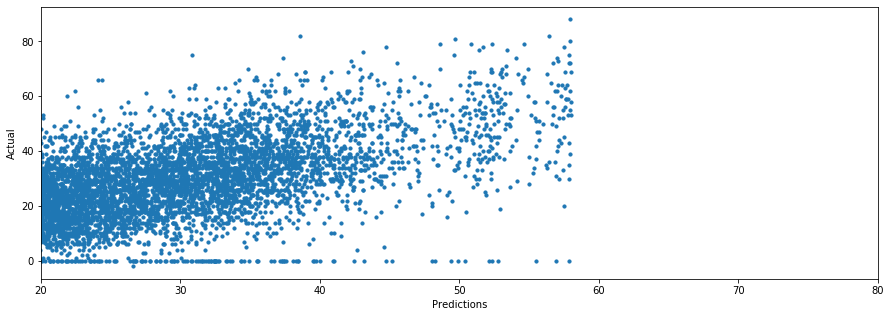

In [11]:
plt.figure(figsize=(15,5))
plt.scatter(predictions, y_test, s = 10)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.xlim(20,80)

In [12]:
model.save(f'../models/{type_nn}_Model_{num_games}[{epo}_{batches}].h5')

In [13]:
assert False

AssertionError: 

### Sklearn Regression

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = train_size)

reg = LinearRegression()
x_train = standard.fit_transform(x_train)
x_test = standard.fit_transform(x_test)
reg.fit(x_train, y_train)
coef = list(zip(x_col, [round(i,3) for i in reg.coef_[0]]))
print(coef)

In [ ]:
# predictions = reg.predict(x_test)
# plt.figure(figsize =(8,5))
# plt.scatter(y_test, predictions)
# plt.xlabel('Actual'); plt.ylabel('Predictions'); plt.title('All Coeficients')

## Gradient Descent

In [ ]:
def  cal_cost(theta,X,y):
    '''
    
    Calculates the cost for given X and Y. The following shows and example of a single dimensional X
    theta = Vector of thetas 
    X     = Row of X's np.zeros((2,j))
    y     = Actual y's np.zeros((2,1))
    
    where:
        j is the no of features
    '''
    
    m = len(y)
    
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    #print(X)
    #print(y)
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):
        
        prediction = np.dot(X,theta)
        
        theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - y)))
        theta_history[it,:] =theta.T
        cost_history[it]  = cal_cost(theta,X,y)
        
    return theta, cost_history, theta_history

# def stochastic_descent(X,y, learning_rate = .0001, iterations = 1): 
#     theta = None
#     m = len(y)
#     cost_history = np.zeros(iterations)
#     for I in range(iterations):
#         cost = 0.0
#         for i in range(m):
#             rand_ind = np.random.randint(0,m)
#             X_i = X[rand_ind, :].reshape(1, X.shape[1])
#             y_i = y[rand_ind].reshape(1,1)
#             prediction = np.dot(X_i, theta)
#             theta = theta - (1/m) * learning_rate * (X_i.T.dot((prediction - y_i)))
#             cost += cal_cost(theta, X_i, y_i)
#         cost_history = cost 
#     return theta, cost_history
            
            

In [ ]:
lr = .001
n_iter = 1000 
theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]
X.reshape(-1,1,1)
#theta, cost_history, theta_history = gradient_descent(X,y,theta, lr, n_iter)

In [ ]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(new_x,new_y, train_size = train_size)

reg2 = LinearRegression()
x_train2 = standard.fit_transform(x_train2)
x_test2 = standard.fit_transform(x_test2)
reg2.fit(x_train2, y_train2)
coef2 = list(zip(new_coef, [round(i,3) for i in reg2.coef_[0]]))
print(coef2)

In [ ]:
predictions2 = reg2.predict(x_test2)
plt.figure(figsize =(12,8))
plt.scatter(y_test2, predictions2)
plt.xlabel('Actual'); plt.ylabel('Predictions'); plt.title('New Coeficients')